# Dataset 3

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from functions import rbf_kernel, predict, accuracy, f1_score, one_vs_all, one_vs_one
from mlxtend.plotting import plot_decision_regions
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.svm import SVC
from functions import rbf_kernel, predict, accuracy, f1_score, MySVM, quad, confusion_matrix, roc_plot
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [7]:
filename = 'data_3.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 3: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)

Number of samples in dataset 3:  100
Distribution of samples among different classes:  [34 33 33]


## (i) Scatter the data

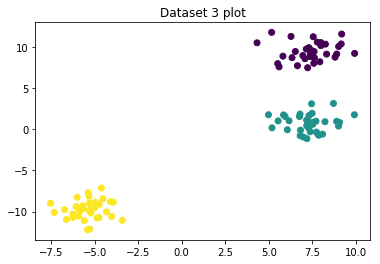

In [8]:
plt.figure()
plt.title('Dataset 3 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset3_plot.png')
plt.show()

## (ii) Plot the dataset with decision boundaries corresponding to the kernel used

### One-vs-All Approach

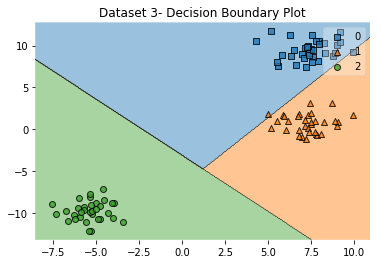

In [9]:
models = one_vs_all(X, y)


class my:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        Z = np.zeros((X.shape[0]))
        for y_i in range(3):
            clf = models[y_i]
            w = clf._get_coef()[0]
            b = clf.intercept_

            idx = np.where(predict(X, w, b) == 1)
            Z[idx] = y_i

        return Z


plot_decision_regions(X, y, clf=my(models))
plt.title('Dataset 3- Decision Boundary Plot')
plt.savefig('dataset3_decision_boundary_plot.png')
plt.show()


### One-vs-One Approach

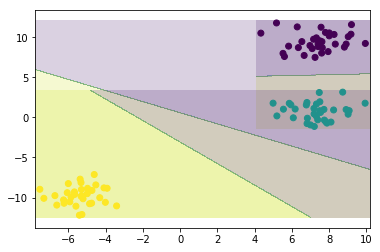

In [10]:
models = one_vs_one(X, y)
k = 0
colors = 'bry'
idxs = []
pad = 0.25
h = 1000
x1_min, x1_max = X[:, 0].min() - pad, X[:, 0].max() + pad
x2_min, x2_max = X[:, 1].min() - pad, X[:, 1].max() + pad
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
for y_i in range(2):
    for y_j in range(y_i + 1, 3):
        e1 = np.where(y == y_i)[0]
        e2 = np.where(y == y_j)[0]
        X_ = np.vstack((X[e1], X[e2]))
        p = np.random.permutation(len(X_))
        X_ = X_[p]

        clf = models[k]
        k += 1
        
        w = clf._get_coef()[0]
        b = clf.intercept_
        
        x1_min, x1_max = X_[:, 0].min() - pad, X_[:, 0].max() + pad
        x2_min, x2_max = X_[:, 1].min() - pad, X_[:, 1].max() + pad
        x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, h), np.linspace(x2_min, x2_max, h))
        
        idx = np.where(predict(np.c_[x1.ravel(), x2.ravel()], w, b) == 1)
        idxs.append(idx)


        Z = predict(np.c_[x1.ravel(), x2.ravel()], w, b)
        Z = Z.reshape(x1.shape)
        plt.contourf(x1, x2, Z, alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


## (iii) Soft margin SVM with linear kernel

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
colors = 'bry'
models = one_vs_all(X_train, y_train)
Z = np.zeros(len(y_test))
for y_i in range(3):
    clf = models[y_i]
    w = clf._get_coef()[0]
    b = clf.intercept_

    r = predict(X_test, w, b)
    idx = np.where(r == 1)
    
    Z[idx] = y_i
    
print(accuracy(Z, y_test))
print(f1_score(y_test, Z))

1.0
1.0


## (iv) Soft margin SVM with rbf kernel

In [12]:
gamma = -1
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
models = one_vs_all(X_train, y_train)
Z = np.zeros(len(y_test))
for y_i in range(3):
    clf = models[y_i]
    w = clf._get_coef()[0]
    b = clf.intercept_
    
    r = predict(X_test, w, b)
    idx = np.where(r == 1)
    
    Z[idx] = y_i
    
print(accuracy(Z, y_test))
print(f1_score(y_test, Z))


1.0
1.0
